# Problema 1

Energia média:

$$E_{m}=\frac{1}{M}\left[ 4r_{1}^{2} + 4r_{2}^{2}  \right]$$

In [1]:
def energy(r1,r2):
    em=(r1**2+r2**2)/8

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plotConstellation(constellation,M):
    from math import log2
    fig, axs = plt.subplots(1, 1)
    axs.plot(np.real(constellation),np.imag(constellation),'o')
    for i in range(0,M):
        axs.annotate("{0:0{1}b}".format(i,int(log2(M))),(np.real(constellation[i]),np.imag(constellation[i])))
    axs.set_title('Constellation')
    axs.set_xlabel('I')
    axs.set_ylabel('Q')

def modulate(constellation,inputSymbols):
    modulatedVec = constellation[inputSymbols]
    return modulatedVec 

def demodulate(constellation,receivedSyms):
    # received vector and reference in cartesian form
    from scipy.spatial.distance import cdist
    XA = np.column_stack((np.real(receivedSyms),np.imag(receivedSyms)))
    XB = np.column_stack((np.real(constellation),np.imag(constellation)))
        
    d = cdist(XA,XB,metric='euclidean') #compute pair-wise Euclidean distances
    detectedSyms=np.argmin(d,axis=1)#indices corresponding minimum Euclid. dist.
    return detectedSyms

def awgn(s, SNRdB):
    gamma = 10**(SNRdB/10) #SNR to linear scale
    P=np.sum(abs(s)**2)/len(s) # power in the vector -> P=sum (X^{2})/M
    N0=P/gamma # noise spectral density
    n = np.sqrt(N0/2)*(np.random.randn(len(s)) + 1j*np.random.randn(len(s))) # AWGN with unity power
    r = s + n # received signal + noise
    return r

In [4]:
def Constellation(r1,r2):
    M=8
    m=np.arange(0,4)
    #a=np.asarray([x^(x>>1) for x in n])
    r1=1
    r2=np.sqrt(2)
    I1 = r1*np.cos(m/2*np.pi)
    Q1 = r1*np.sin(m/2*np.pi)
    I2 = r2*np.cos(m/2*np.pi+np.pi/4)
    Q2 = r2*np.sin(m/2*np.pi+np.pi/4)
    c1 = I1 + 1j*Q1
    c2 = I2 + 1j*Q2
    constellation=np.append(c1,c2)
    return constellation

item c: SER para $r_{1}=1$ e $r_{2}=\sqrt 2$
Começamos plotando a constelação, para ver se está tudo funcionando, e depois fazemos o cálculo da SER.

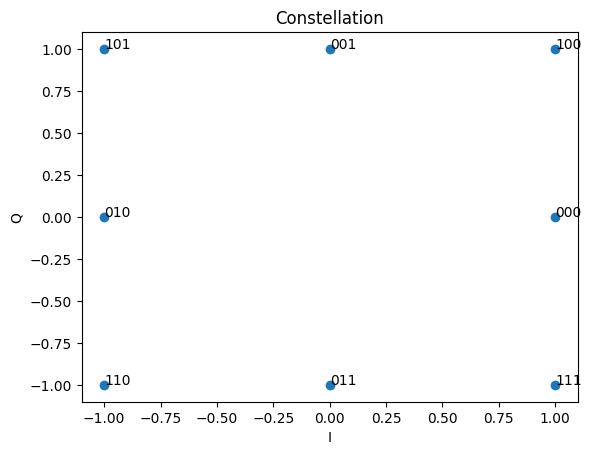

In [5]:
constellation = Constellation(1,np.sqrt(2))
plotConstellation(constellation,8)

(1e-06, np.float64(0.5362586597292209))

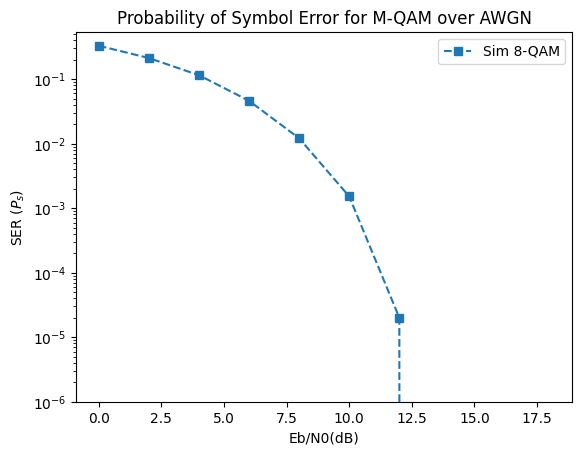

In [6]:
#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit # also, compile time for 10**6 is over 30s. for a quicker result do either 10**5 or 10**4
EbN0dBs = np.arange(start=0,stop = 20, step = 2) # Eb/N0 range in dB for simulation

#colors = plt.cm.jet(np.linspace(0,1,len(arrayOfM))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)

M=8
k=np.log2(M)
EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
SER_sim = np.zeros(len(EbN0dBs)) # simulated Symbol error rates
inputSyms = np.random.randint(low=0, high = M, size=nSym) # uniform random symbols from 0 to M-1

modulatedSyms = modulate(constellation,inputSyms) #modulate

for j,EsN0dB in enumerate(EsN0dBs):
    receivedSyms = awgn(modulatedSyms,EsN0dB) #add awgn noise
    detectedSyms = demodulate(constellation,receivedSyms)
        
    SER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym
    
    
ax.semilogy(EbN0dBs,SER_sim,marker='s',linestyle='--',label='Sim '+str(M)+'-QAM')

ax.set_xlabel('Eb/N0(dB)')
ax.set_ylabel('SER ($P_s$)')
ax.set_title('Probability of Symbol Error for M-QAM over AWGN')
ax.legend()
ax.set_ylim(1e-6) # if you don't set the limit it will get goofy. leave this untouched.

item d: Mesmo que o item c, mas para $r_{1}=r_{2}=1$

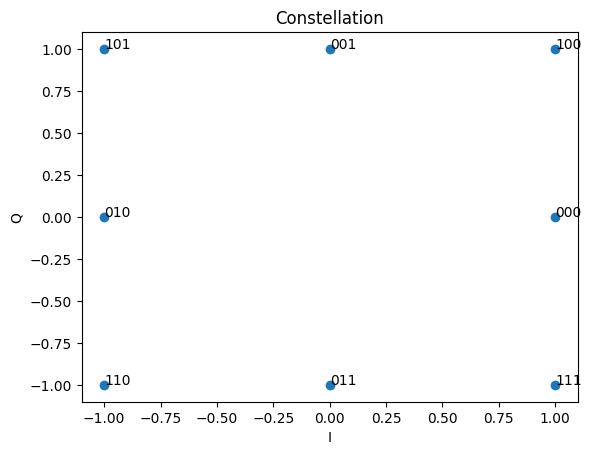

In [7]:
constellation = Constellation(1,1)
plotConstellation(constellation,8)

(1e-06, np.float64(0.4871233577961846))

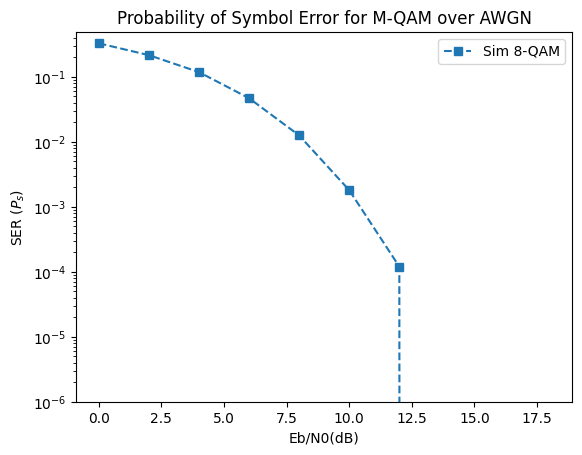

In [8]:
#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit # also, compile time for 10**6 is over 30s. for a quicker result do either 10**5 or 10**4
EbN0dBs = np.arange(start=0,stop = 20, step = 2) # Eb/N0 range in dB for simulation

#colors = plt.cm.jet(np.linspace(0,1,len(arrayOfM))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)

M=8
k=np.log2(M)
EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
SER_sim = np.zeros(len(EbN0dBs)) # simulated Symbol error rates
inputSyms = np.random.randint(low=0, high = M, size=nSym) # uniform random symbols from 0 to M-1

modulatedSyms = modulate(constellation,inputSyms) #modulate

for j,EsN0dB in enumerate(EsN0dBs):
    receivedSyms = awgn(modulatedSyms,EsN0dB) #add awgn noise
    detectedSyms = demodulate(constellation,receivedSyms)
        
    SER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym
    
    
ax.semilogy(EbN0dBs,SER_sim,marker='s',linestyle='--',label='Sim '+str(M)+'-QAM')

ax.set_xlabel('Eb/N0(dB)')
ax.set_ylabel('SER ($P_s$)')
ax.set_title('Probability of Symbol Error for M-QAM over AWGN')
ax.legend()
ax.set_ylim(1e-6) # if you don't set the limit it will get goofy. leave this untouched.